# **Overview**

# **Library and Configuration**

In [52]:
# System & Environment Configuration
import sys
import importlib
sys.path.append("..")

# Ignore warning
from warnings import filterwarnings
filterwarnings("ignore")

# Core Library
import numpy as np
import pandas as pd
from pathlib import Path

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Source helper
import src.exploration as explore
def r(module=explore):
    importlib.reload(module)

# Defaults
pd.set_option('display.max_colwidth', None)
sns.set_style('whitegrid')

# Train and Test Processed
PROCESSED_ROOT = Path('../data/processed/')

TRAIN_PATH_PROCESSED = PROCESSED_ROOT/'train.csv'
TEST_PATH_PROCESSED = PROCESSED_ROOT/'test.csv'

# Figures Path
FIGURE_PATH = Path('../reports/figures')

print('library and configuration ready!')

library and configuration ready!


# **Train and Test Loading**

In [13]:
train = pd.read_csv(TRAIN_PATH_PROCESSED)
test = pd.read_csv(TEST_PATH_PROCESSED)

print('Train shape :', train.shape)
print('Test Shape  :', test.shape)

Train shape : (18942, 39)
Test Shape  : (1077, 39)


# **General Analysis**

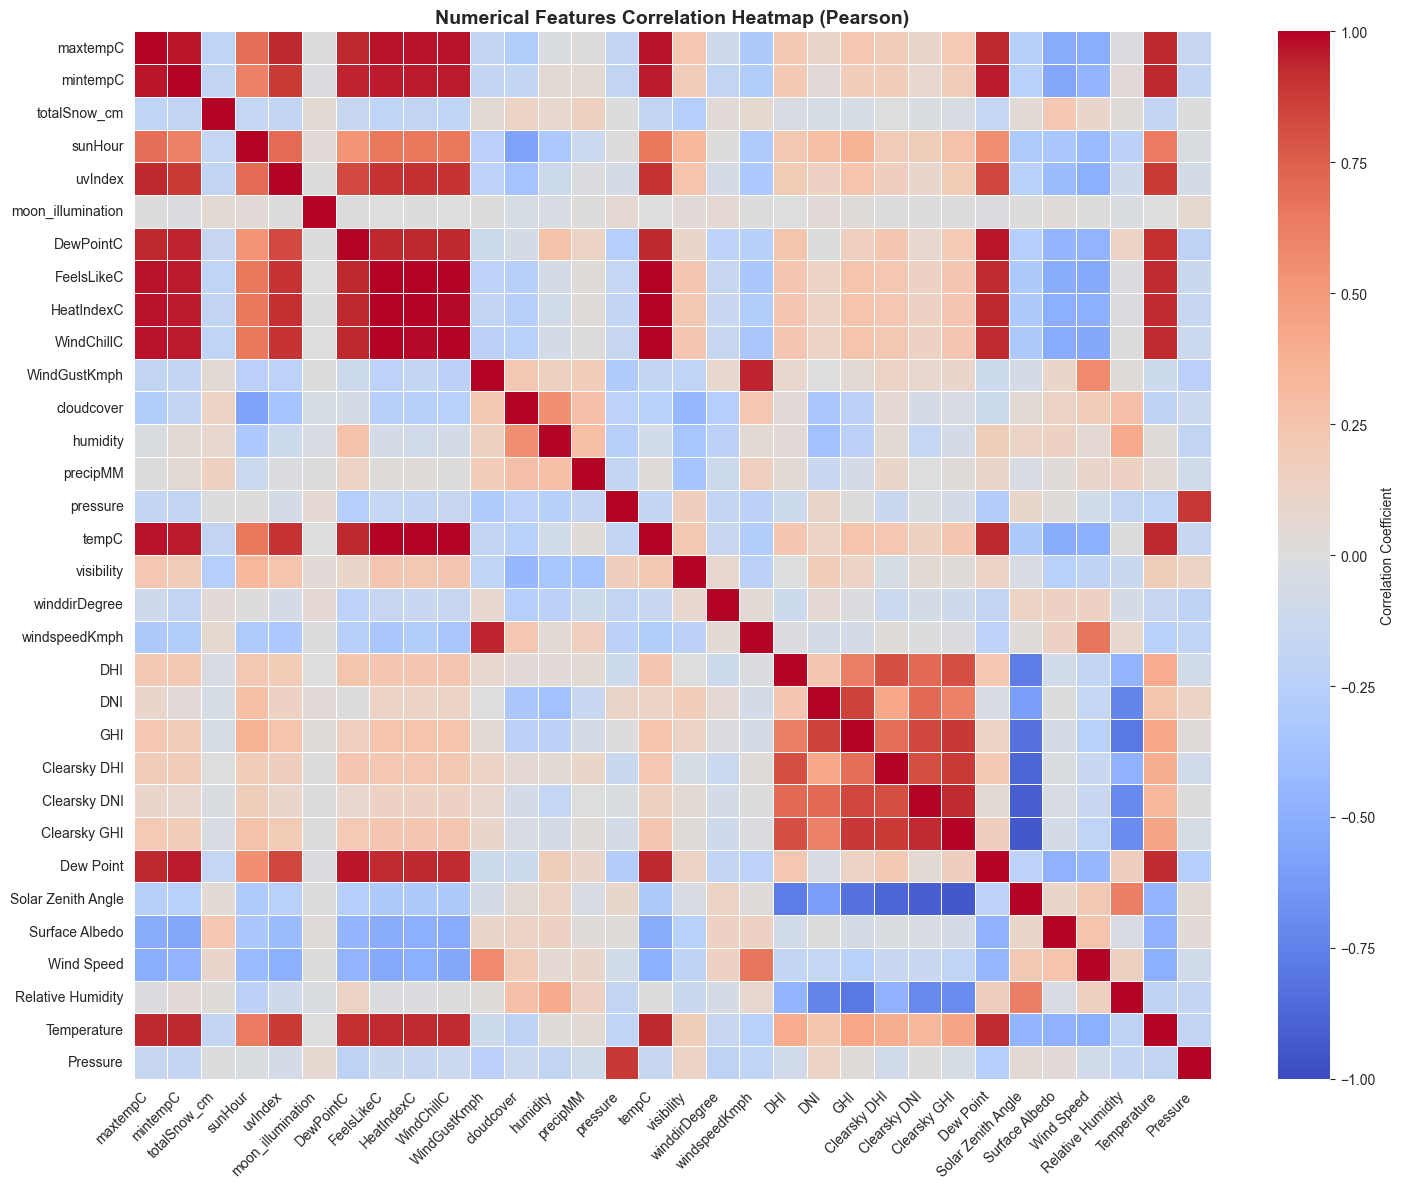

In [91]:
numerical_features = X.select_dtypes(np.number).columns

explore.plot_numerical_correlation(X, numerical_features, save_path=FIGURE_PATH/'feature_correlation.png')

# **Target Inspections**

In [ ]:
# For a flexible exploration, we can separate features and target
TARGET = '% Baseline'

X=train.drop(columns=[TARGET])
y=train[TARGET]

print('Train features shape :', X.shape)
print('Train target shape   :', y.shape)

Train features shape : (18942, 38)
Train target shape   : (18942,)


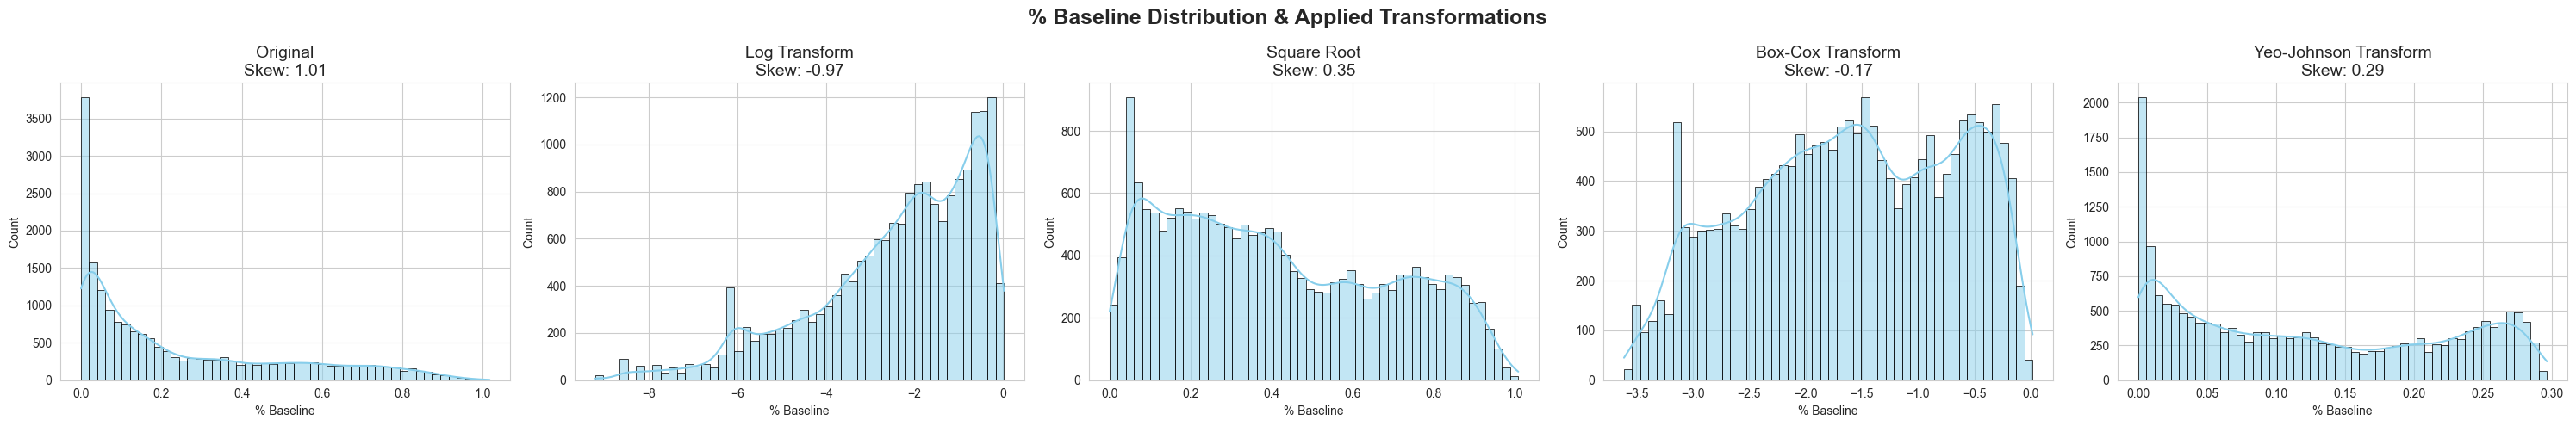

In [55]:
explore.check_transformations(
    y, TARGET, transforms=["original", "log", "sqrt", "boxcox", "yeojohnson"]
)

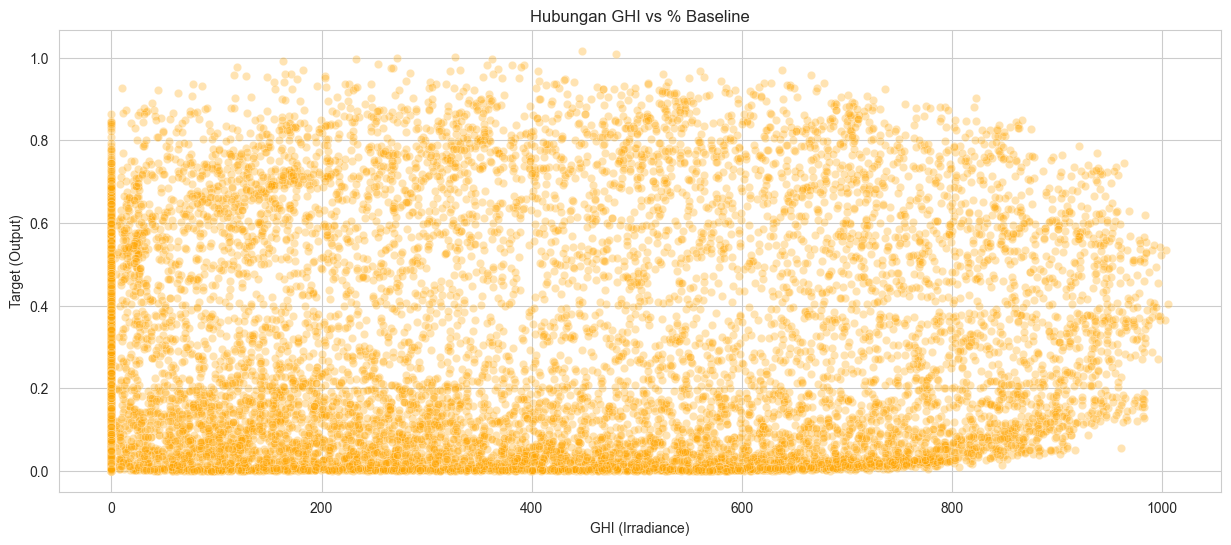

In [89]:
plt.figure(figsize=(15, 6))

# Scatter plot GHI vs Target
sns.scatterplot(x=train['GHI'], y=train[TARGET], alpha=0.3, color='orange')
plt.title(f"Hubungan GHI vs {TARGET}")
plt.xlabel("GHI (Irradiance)")
plt.ylabel("Target (Output)")
plt.show()

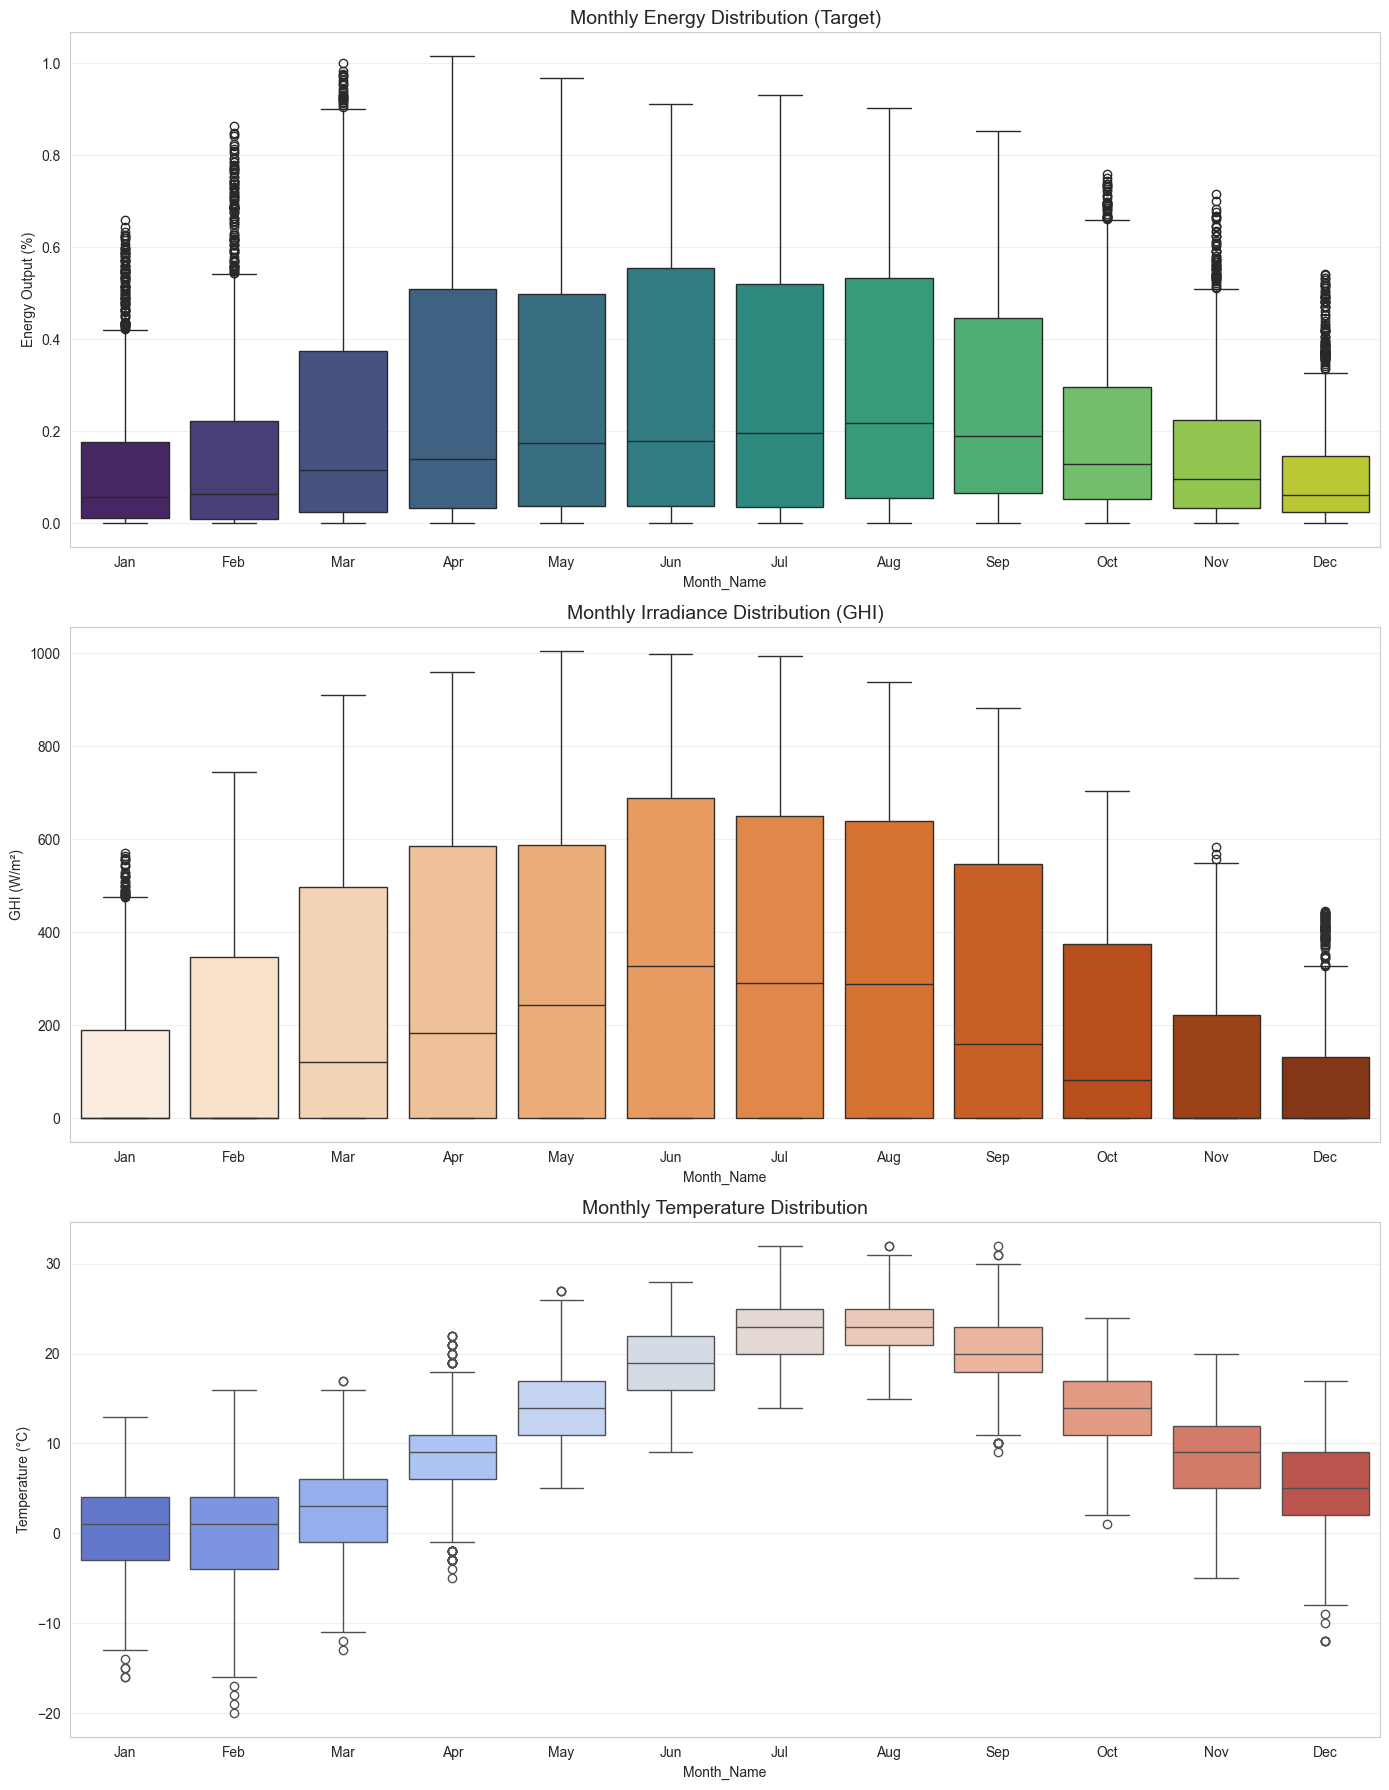

In [90]:
# Monthly energy distribution
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

explore.plot_monthly_target_distribution(train, '% Baseline', ax=axes[0])
explore.plot_monthly_ghi_distribution(train, ax=axes[1])
explore.plot_monthly_temperature_distribution(train, ax=axes[2])

plt.tight_layout()
plt.show()

# **Exploration for Similar Features**

Saved: ..\reports\figures\boxplot_temperature.png
Saved: ..\reports\figures\dist_temperature.png
Saved: ..\reports\figures\boxplot_pressure.png
Saved: ..\reports\figures\dist_pressure.png
Saved: ..\reports\figures\boxplot_dewpoint.png
Saved: ..\reports\figures\dist_dewpoint.png


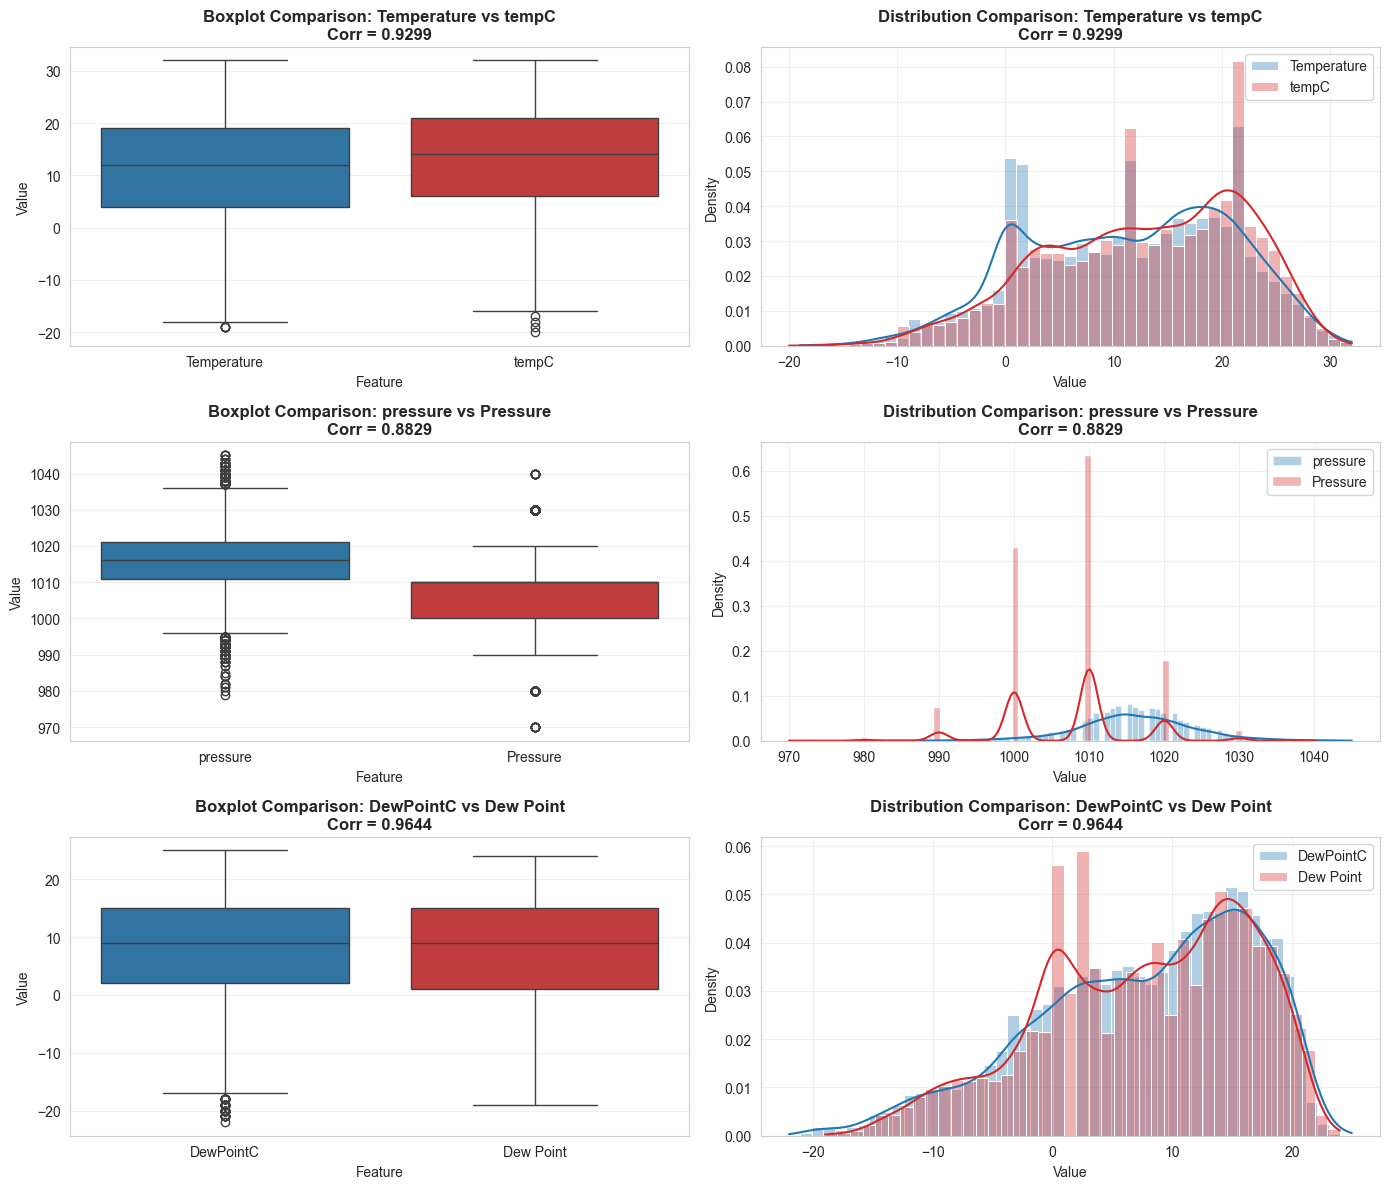

In [86]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

r()
# Temperature
explore.compare_features_boxplot(
    train, ['Temperature','tempC'], ax=axes[0,0],
    save_path=FIGURE_PATH/'boxplot_temperature.png')
explore.compare_features_distribution(
    train, ['Temperature','tempC'], ax=axes[0,1],
    save_path=FIGURE_PATH/'dist_temperature.png')

# Pressure
explore.compare_features_boxplot(
    train, ['pressure','Pressure'], ax=axes[1,0],
    save_path=FIGURE_PATH/'boxplot_pressure.png')
explore.compare_features_distribution(
    train, ['pressure','Pressure'], ax=axes[1,1],
    save_path=FIGURE_PATH/'dist_pressure.png')

# Dew Point
explore.compare_features_boxplot(
    train, ['DewPointC','Dew Point'], ax=axes[2,0],
    save_path=FIGURE_PATH/'boxplot_dewpoint.png')
explore.compare_features_distribution(
    train, ['DewPointC','Dew Point'], ax=axes[2,1],
    save_path=FIGURE_PATH/'dist_dewpoint.png')

plt.tight_layout()
plt.show()

# **Astronomical and Physical Analysis**

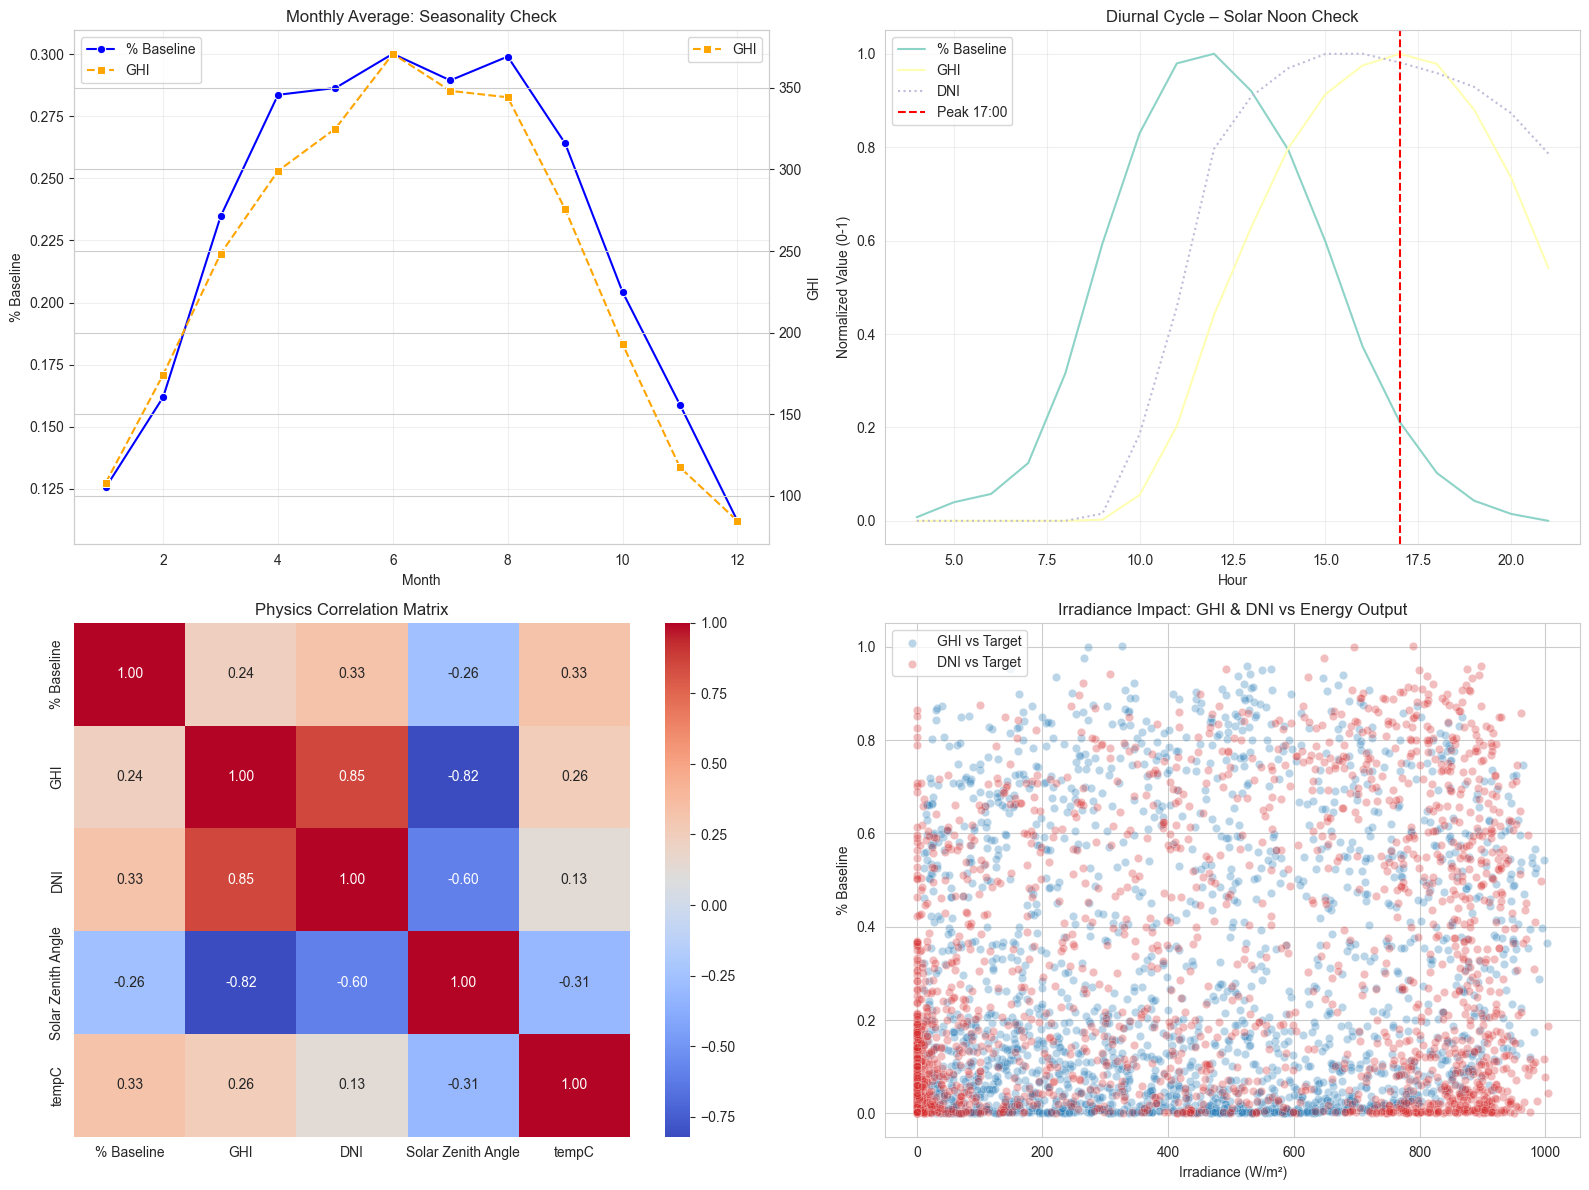

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

physics_feature = ['GHI', 'DNI', 'Solar Zenith Angle', 'tempC']

explore.plot_monthly_seasonality(train, TARGET, ax=axes[0, 0])
explore.plot_diurnal_cycle(train, TARGET, ax=axes[0, 1])
explore.plot_physics_correlation(train, TARGET, physics_feature, ax=axes[1, 0])
explore.plot_irradiance_scatter(train, TARGET, ax=axes[1, 1])

plt.tight_layout()
plt.show()

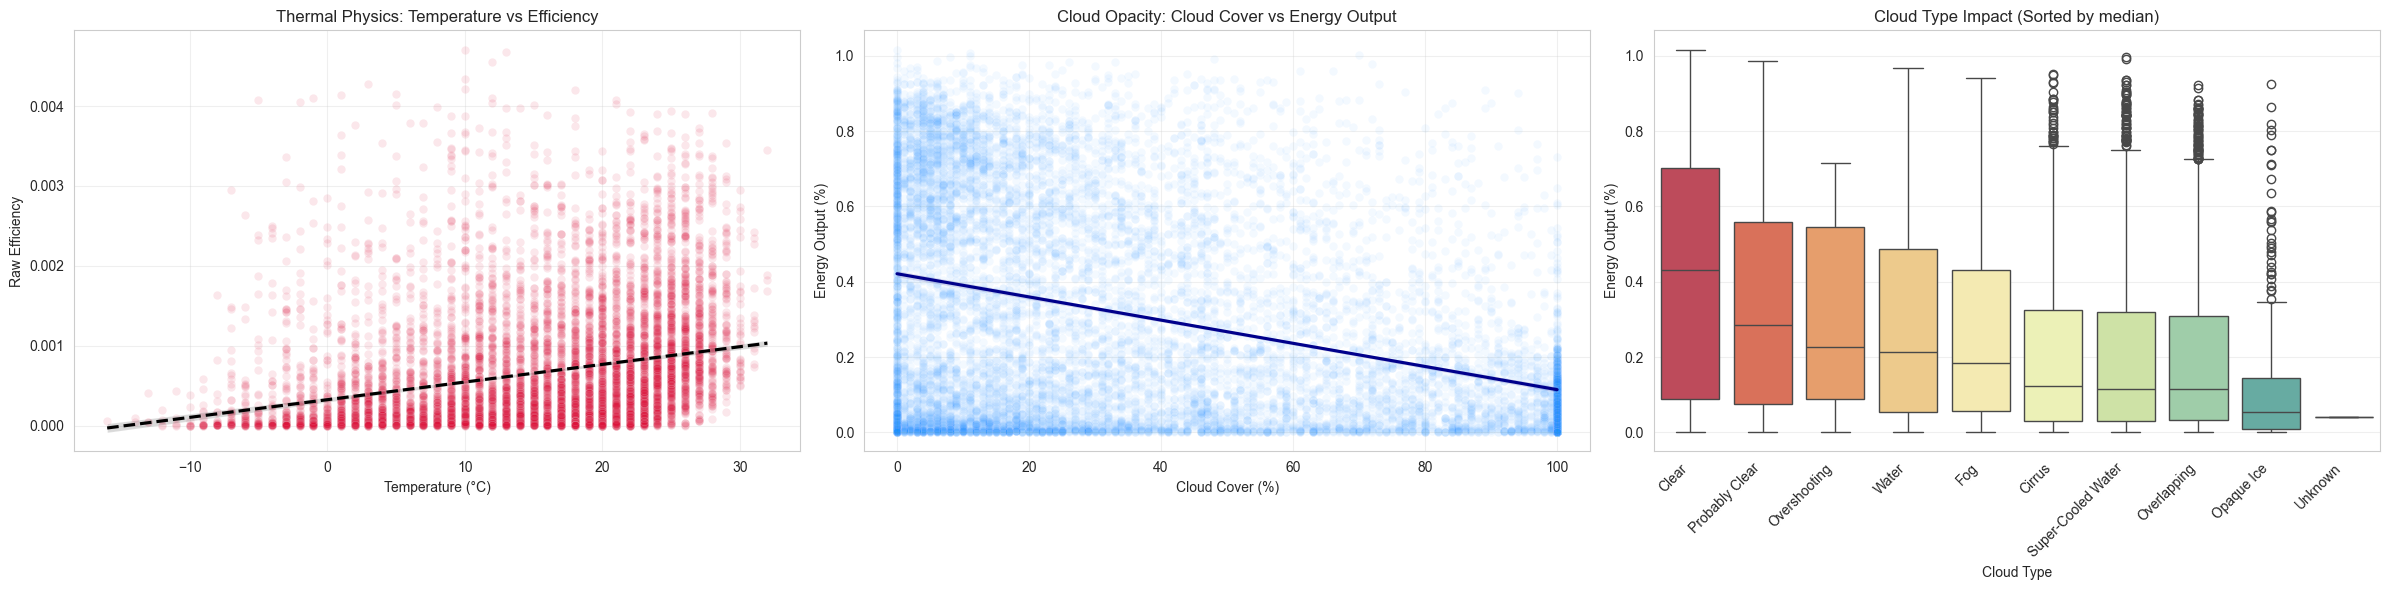

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

r()
explore.plot_temp_vs_efficiency(train, ax=axes[0])
explore.plot_cloudcover_vs_energy(train, ax=axes[1])
explore.plot_cloudtype_impact(train, sort_by='median', ax=axes[2])

plt.tight_layout()
plt.show()